# Dihedrals analysis on non-standard dihedrals

In [1]:
from offpelebenchmarktools.dihedrals import (DihedralBenchmark,
                                             OpenMMEnergeticProfile,
                                             OpenFFEnergeticProfile,
                                             PELEEnergeticProfile)
from offpele.topology import Molecule
from openforcefield.topology import Topology
from openforcefield.typing.engines.smirnoff import ForceField
from simtk import unit

## Test the single problematic dihedral (2,3,5,8)

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to '[H]c1c(c(n(n1)S(=O)(=O)C([H])([H])C([H])([H])[H])[H])O[H]'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library


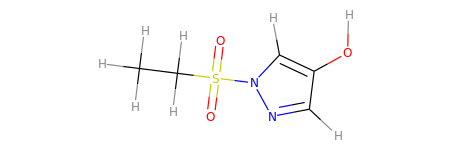

 - Loading forcefield
 - Computing partial charges with gasteiger


In [2]:
# Load molecule
mol = Molecule(smiles='[H]c1c(c(n(n1)S(=O)(=O)C([H])([H])C([H])([H])[H])[H])O[H]')
display(mol)

# Parameterize molecule
mol.parameterize('openff_unconstrained-1.2.1.offxml',
                 charges_method='gasteiger')

# Get parameters with the OpenFF Toolkit
topology = Topology.from_molecules([mol.off_molecule])
ff = ForceField('openff_unconstrained-1.2.1.offxml')
parameters = ff.label_molecules(topology)[0]

In [3]:
# Filter out all non interesting dihedrals
propers_to_keep = list()
for p in mol.propers:
    if p.phase not in (unit.Quantity(0, unit.degree),
                       unit.Quantity(180, unit.degree)):
        propers_to_keep.append(p)

mol._propers = propers_to_keep
mol._impropers = []

In [4]:
# Define dihedral with atom indexes
i, j, k, l = (propers_to_keep[0].atom1_idx,
              propers_to_keep[0].atom2_idx,
              propers_to_keep[0].atom3_idx,
              propers_to_keep[0].atom4_idx)

<ProperTorsionType with smirks: [#6X4:1]-[#16X4,#16X3+0:2]-[#7X3:3]-[#6X3:4]  periodicity1: 3  periodicity2: 2  phase1: 90.0 deg  phase2: 0.0 deg  id: t142  k1: -0.5050335923881 kcal/mol  k2: 0.3649469393198 kcal/mol  idivf1: 1.0  idivf2: 1.0  >


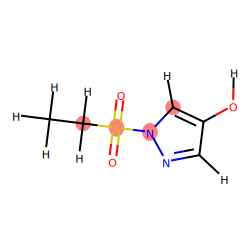

In [5]:
dihedral_benchmark = DihedralBenchmark((i, j, k, l), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

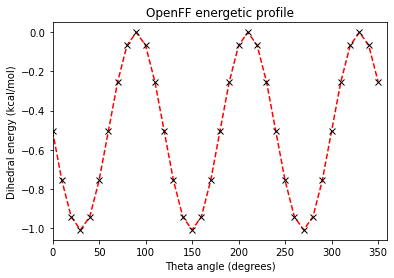

In [6]:
# Plot its theoretical energetic profile
off_ep = OpenFFEnergeticProfile(dihedral_benchmark)
for idxs, p in off_ep._parameters.items():
    for i, phase in enumerate(p.phase):
        if phase not in (unit.Quantity(0, unit.degree),
                         unit.Quantity(180, unit.degree)):
            pass
        else:
            p.k[i] = unit.Quantity(0, unit.kilocalorie / unit.mole)

off_ep.plot_energies(resolution=10)

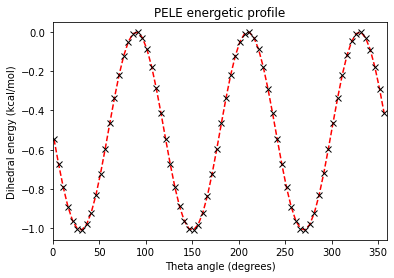

In [7]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=5)

In [8]:
from offpelebenchmarktools.utils.pele import PELESinglePoint

pele_sp = PELESinglePoint(
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')

mol.set_name('molecule1')
pele_sp.run(mol)

'/home/municoy/repos/offpele-benchmarks/benchmarks/geometry/output/molecule1/PELE_output.txt'

## Test all dihedrals that affect bond (3,5)

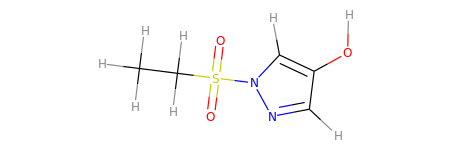

In [9]:
# Load molecule
mol = Molecule(smiles='[H]c1c(c(n(n1)S(=O)(=O)C([H])([H])C([H])([H])[H])[H])O[H]')
display(mol)

# Parameterize molecule
mol.parameterize('openff_unconstrained-1.2.1.offxml',
                 charges_method='gasteiger')

# Get parameters with the OpenFF Toolkit
topology = Topology.from_molecules([mol.off_molecule])
ff = ForceField('openff_unconstrained-1.2.1.offxml')
parameters = ff.label_molecules(topology)[0]

In [10]:
# Filter out all non interesting dihedrals
problematic_propers = list()
for p in mol.propers:
    if p.phase not in (unit.Quantity(0, unit.degree),
                       unit.Quantity(180, unit.degree)):
        problematic_propers.append(p)


In [11]:
proper_to_analyze = problematic_propers[0]

In [12]:
# Define dihedral with atom indexes
i, j, k, l = (proper_to_analyze.atom1_idx,
              proper_to_analyze.atom2_idx,
              proper_to_analyze.atom3_idx,
              proper_to_analyze.atom4_idx)

<ProperTorsionType with smirks: [#6X4:1]-[#16X4,#16X3+0:2]-[#7X3:3]-[#6X3:4]  periodicity1: 3  periodicity2: 2  phase1: 90.0 deg  phase2: 0.0 deg  id: t142  k1: -0.5050335923881 kcal/mol  k2: 0.3649469393198 kcal/mol  idivf1: 1.0  idivf2: 1.0  >


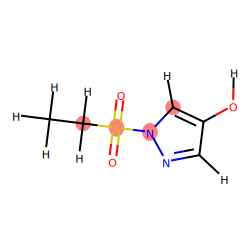

In [13]:
dihedral_benchmark = DihedralBenchmark((i, j, k, l), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

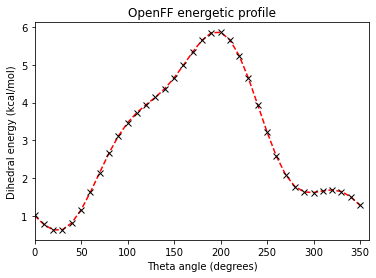

In [14]:
# Plot its theoretical energetic profile
off_ep = OpenFFEnergeticProfile(dihedral_benchmark)
off_ep.plot_energies(resolution=10)

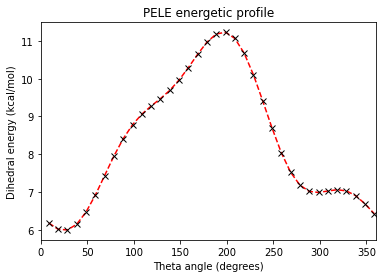

In [15]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

## Test all theoretical dihedrals

In [11]:
from offpele.topology import Molecule, Proper

from offpelebenchmarktools.dihedrals import (DihedralBenchmark,
                                             PELEEnergeticProfile,
                                             OFFPELEEnergeticProfile)

from simtk import unit

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CCCC'
   - Representing molecule with the Open Force Field Toolkit


 - Generating rotamer library
 - Loading forcefield
 - Computing partial charges with am1bcc


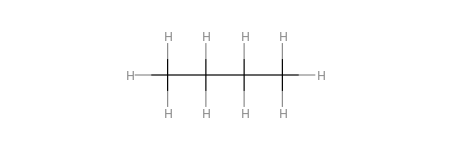

In [2]:
mol = Molecule(smiles='CCCC')

mol.parameterize('openff_unconstrained-1.2.1.offxml')

display(mol)

### Periodicity = 1

In [17]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=1, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


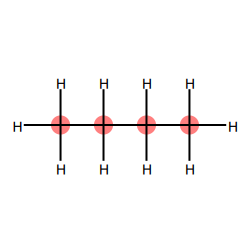

In [18]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

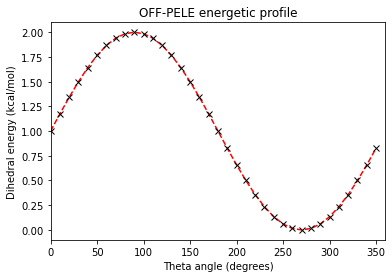

In [19]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

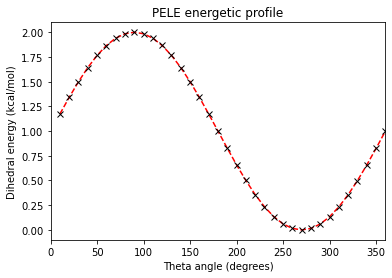

In [20]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

### Periodicity = 2

In [13]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=2, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


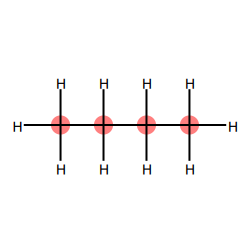

In [14]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

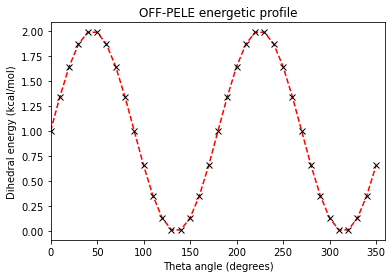

In [15]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

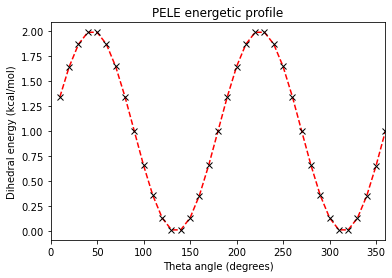

In [16]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

### Periodicity = 3

In [4]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=3, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


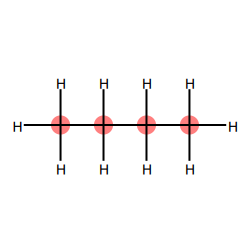

In [5]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

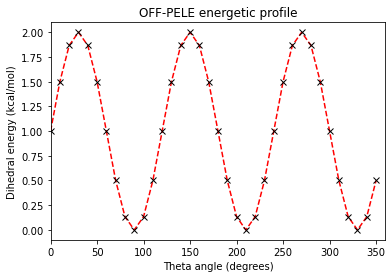

In [6]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

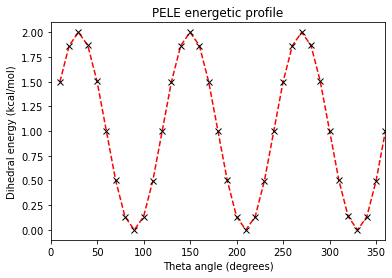

In [12]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

### Periodicity = 4

In [21]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=4, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


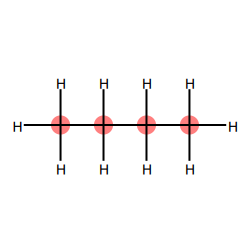

In [22]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

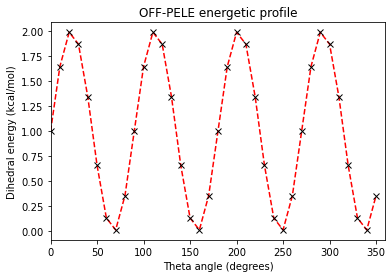

In [23]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

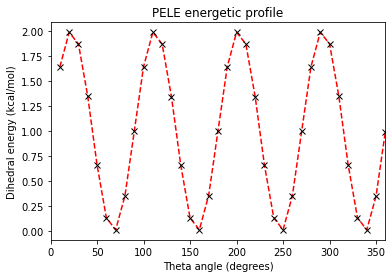

In [24]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

### Periodicity = 5 (_TO DO_)

In [31]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=5, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


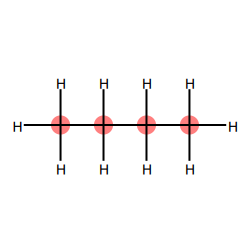

In [32]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

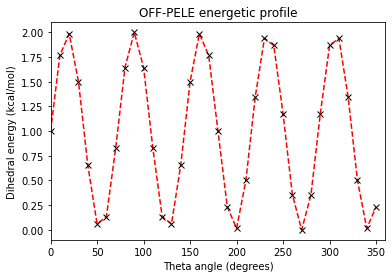

In [33]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

In [34]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)

AttributeError: 'NoneType' object has no attribute 'value_in_unit'

### Periodicity = 6

In [27]:
proper = Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3,
                periodicity=6, prefactor=1,
                constant=unit.Quantity(1, unit.kilocalorie / unit.mole),
                phase=unit.Quantity(90, unit.degree))

mol._propers = [proper]
mol._impropers = list()

<ProperTorsionType with smirks: [#6X4:1]-[#6X4:2]-[#6X4:3]-[#6X4:4]  periodicity1: 3  periodicity2: 2  periodicity3: 1  phase1: 0.0 deg  phase2: 180.0 deg  phase3: 180.0 deg  id: t2  k1: 0.1703506220295 kcal/mol  k2: 0.198190228795 kcal/mol  k3: 0.2452303834803 kcal/mol  idivf1: 1.0  idivf2: 1.0  idivf3: 1.0  >


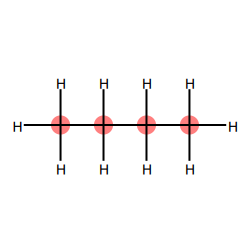

In [28]:
dihedral_benchmark = DihedralBenchmark(
    (proper.atom1_idx, proper.atom2_idx, proper.atom3_idx, proper.atom4_idx), mol)
print(dihedral_benchmark.get_dihedral_parameters())
dihedral_benchmark.display_dihedral()

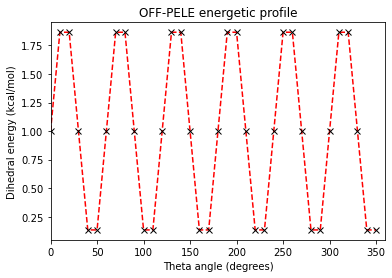

In [29]:
# Plot its theoretical energetic profile
offpele_ep = OFFPELEEnergeticProfile(dihedral_benchmark)
offpele_ep.plot_energies(resolution=10)

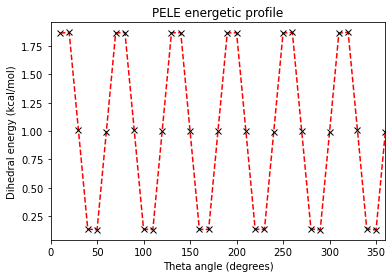

In [30]:
# Plot the energetic profile obtained with PELE
pele_ep = PELEEnergeticProfile(
    dihedral_benchmark,
    PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
    PELE_src='/home/municoy/repos/PELE-repo/')
pele_ep.plot_energies(resolution=10)